In [37]:
import sys, os
sys.path.append(os.pardir)

from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,  normalize=True)
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

def get_data(flatten : bool = True, normalize : bool  = True, one_hot_label : bool = False ):
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=flatten,  normalize=normalize, one_hot_label = one_hot_label)

    return x_train, t_train


(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [13]:
from PIL import Image
import numpy as np

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

img = x_train[0]
label = t_train[0]

print(img.shape)
img = img.reshape(28,28)
img_show(img)

(784,)


In [21]:
# 입력층 784, 출력층이 10 인 이유는 사진의 크기가 28*28 = 784 이고 0 ~ 9까지의 숫자를 분류하는 신경망이기 때문이다.
import pickle

x,t = x_test, t_test

def init_network():
    with open("sample_weight.pkl",'rb') as f:
        network = pickle.load(f)
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def softmax(x):
    return np.exp(x - np.max(x)) / np.sum(np.exp(x - np.max(x)))

def predict(network, x):
    w1,w2,w3 = network['W1'], network['W2'], network['W3']
    b1,b2,b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x,w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,w3) + b3
    y = softmax(a3)
    return y

accuracy_cnt = 0
network = init_network()

for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)

    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy : " + str(float(accuracy_cnt) / len(x)))

Accuracy : 0.9352


In [24]:
### 배치처리

x,t = get_data()
network = init_network()
batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i + batch_size]
    y_batch = predict(network, x_batch)
    print(y_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
print(accuracy_cnt/len(x))

[[3.29137447e-06 1.02745219e-07 2.78982461e-05 4.90757993e-05
  4.57291236e-08 1.75426180e-06 6.34364838e-10 3.88771184e-02
  3.65525267e-07 3.19072315e-05]
 [2.38913490e-05 5.45662215e-06 4.66457568e-03 7.06868086e-05
  2.81526846e-09 3.29794457e-05 1.36013899e-04 6.27791907e-09
  6.35489278e-06 2.36450109e-10]
 [4.35422892e-10 4.15724888e-03 1.80313309e-05 7.49591163e-06
  5.53756138e-07 3.19224887e-06 1.97111149e-06 9.54208281e-06
  5.20351841e-06 3.64514335e-07]
 [1.26391863e-02 1.04401132e-09 2.02235242e-05 2.41280713e-06
  5.49404007e-08 4.28640669e-05 5.16990303e-06 2.94927486e-06
  6.14853718e-07 5.34489232e-07]
 [3.63746892e-07 1.15563354e-08 5.08722769e-06 5.85677000e-08
  1.68065703e-03 8.47779859e-07 3.58964189e-06 9.65850268e-06
  2.52930931e-06 5.74644619e-05]
 [1.77337686e-10 5.78274112e-03 1.01278074e-05 1.30993212e-05
  4.94069582e-07 1.74704587e-06 2.03225909e-07 2.79188207e-05
  1.11904646e-05 2.48993433e-06]
 [1.27649598e-08 1.51145571e-07 6.71478162e-08 4.82207213e

#### 기계학습과 딥러닝의 차이
- 기계학습 즉 머신러닝은 데이터에서 feature(특징)을 추출하고 이를 분류하기 위한 알고리즘에 대입 후 결과를 확인하여야 한다. 하지만 딥러닝은 데이터를 넣고 결과를 확인하는 게 다이다. 다른말로 end to end machine learning 이라고도 한다.

#### 훈련 데이터셋과 시험 데이터셋을 나누는 이유
- 훈련을 해서 새로운 데이터에 대한 예측을 하고 싶은거지 기존에 있는 데이터를 예측하고 싶어 만드는 것은 아니다. 이 말은 모든 데이터를 훈련에 사용하면 신경망은 훈련 데이터에만 최적화되어 다른 데이터에는 예측을 못할 가능성이 있다. 이렇게 훈련 데이터에 너무 적합해지는 현상을 overfitting 이라고 한다.

In [26]:
# sse (sum of squares of error)

def sum_squares_error(y,t):
    return 0.5 * np.sum((y-t)**2)


y = [.1,.05,.1,.0,.05,.1,.0,.6,.0,.0]
t = [0,0,1,0,0,0,0,0,0,0]

y = np.array(y)
t = np.array(t)


print(sum_squares_error(y,t))

0.5975


In [ ]:
#### 1e-7 즉 델타를 더해주는 이유는 log에 0이 대입되면 log는 -무한대를 가지는 inf가 되어 계산이 불가하다. 그래서 아주 작은 수인 1e-7을 더해주는 것이다.

def cross_entropy_error(y,t):
    delta = 1e-7
    return - np.sum(t * np.log(y+delta))

In [30]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [.1,.05,.1, .0,.05,.1,.0,.6,.0,.0]
t, y = np.array(t), np.array(y)

print(cross_entropy_error(y,t))

y = [.1,.05,.6, .0,.05,.1,.0,.0,.0,.0]
t, y = np.array(t), np.array(y)
print(cross_entropy_error(y,t))

2.302584092994546
0.510825457099338


In [38]:
x_train, t_train = get_data(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [39]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
y_batch = t_train[batch_mask]

In [ ]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [41]:
def cross_entropy_error_lable(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y[np.arange((batch_size), t)] + 1e-7)) / batch_size

In [48]:
# 수치 미분 - 나쁜 예
def numeric_differentiation(f,x):
    h = 1e-7
    return (f(x + h) - f(x)) / h

# 컴퓨터는 0에 무한히 다가가지 못한다. 그러고 파이썬의 반올림 오차에 의해 일정 자리부터는 무시를 하게 되어 값이 0이 되는 경우가 있다4
# 이를 방지하기 위해 1e-4 정도 즉 10**-4의 값을 사용하는 게 제일 좋다고 한다.

# 수치 미분은 실제 함수의 미분값을 구하지 못할 때 사용하는 방법이다. 세 가지 방법으로 전방미분, 후방미분, 중앙미분이 있다.

def forward_diff(f,x):
    '''전방 미분'''
    h = 1e-4
    return (f(x+h) - f(x)) / h

def backward_diff(f,x):
    '''후방 미분'''
    h = 1e-4
    return (f(x) - f(x-h)) / h

def central_diff(f,x):
    '''중앙 미분'''
    h = 1e-4
    return (f(x + h) - f(x - h)) / 2*h

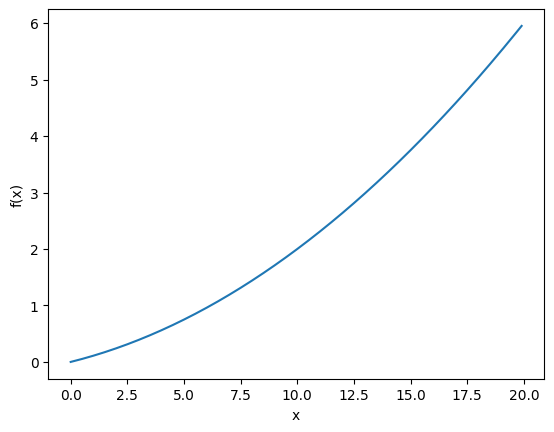

In [46]:
def function(x):
    return 0.01*x**2 + 0.1 * x

import matplotlib.pylab as plt

x = np.arange(.0,20.,.1)
y = function(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [49]:
print(central_diff(function,5))
print(central_diff(function,10))

1.9999999999908982e-09
2.999999999986347e-09


In [ ]:
def function_2(x):
    return x[0]**2 + x[1]**2

def function_2_diff(x):
    return x*x + 4.0**2

print(central_diff(function_2_diff, 3.0))

6.000000000003781e-08


In [81]:
# (delta(y)/delta(x0), delta(y)/delta(x1)) 형태의 백터는 기울기라고 한다.

def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 원상복구
    return grad


print(numerical_gradient(function_2, np.array([3.0,4.0])))
print(numerical_gradient(function_2, np.array([0.0,2.0])))
print(numerical_gradient(function_2, np.array([3.0,0.0])))

[6. 8.]
[0. 4.]
[6. 0.]
